In [16]:
import numpy as np
import pandas as pd
import torch
from transformers import AutoTokenizer
from torchvision import transforms
import os

In [17]:
# Loading the dataset
dataset = pd.read_csv("Dataset/labels.csv")

In [18]:
dataset.head(10)

,Unnamed: 0,image_name,text_ocr,text_corrected,overall_sentiment
0,0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive
1,1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,very_positive
2,2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,positive
3,3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,positive
4,4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral
5,5,image_6.jpg,"1998: ""Don't get in car with strangers"" 2008: ...","1998: ""Don't get in car with strangers"" 2008: ...",negative
6,6,image_7.png,10 years challenge is lit af Üs & B erg 1945 1...,10 years challenge is lit af Üs & B erg 1945 1...,negative
7,7,image_8.jpg,10 Year Challenge emotional edition boredpanda...,10 Year Challenge emotional edition boredpanda...,neutral
8,8,image_9.jpg,Fornite died in 10 months but Minecraft never ...,Fornite died in 10 months but Minecraft never ...,positive
9,9,image_10.png,FACEBOOK '10 YEAR CHALLENGE': A PLOY OR A SIMP...,FACEBOOK '10 YEAR CHALLENGE': A PLOY OR A SIMP...,positive


In [19]:
dataset["overall_sentiment"].unique()

array(['very_positive', 'positive', 'neutral', 'negative',
       'very_negative'], dtype=object)

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6992 entries, 0 to 6991
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         6992 non-null   int64 
 1   image_name         6992 non-null   object
 2   text_ocr           6831 non-null   object
 3   text_corrected     6987 non-null   object
 4   overall_sentiment  6992 non-null   object
dtypes: int64(1), object(4)
memory usage: 273.3+ KB


In [21]:
# Adding the images to the dataset
'''from PIL import Image
import os

image_folder = "Dataset/images/images"  # Path to your images folder

def load_image(image_name):
    image_path = os.path.join(image_folder, image_name)
    if os.path.exists(image_path):
        return Image.open(image_path)
    else:
        return None  # Handle missing images

dataset["image"] = dataset["image_name"].apply(load_image)'''


'from PIL import Image\nimport os\n\nimage_folder = "Dataset/images/images"  # Path to your images folder\n\ndef load_image(image_name):\n    image_path = os.path.join(image_folder, image_name)\n    if os.path.exists(image_path):\n        return Image.open(image_path)\n    else:\n        return None  # Handle missing images\n\ndataset["image"] = dataset["image_name"].apply(load_image)'

In [22]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

image_folder = "Dataset/images/images"

from PIL import Image

def load_image(image_name):
    image_path = os.path.join(image_folder, image_name)
    try:
        with Image.open(image_path) as img:
            return img.copy()  # Ensures the image is fully loaded
    except Exception as e:
        print(f"Error loading {image_name}: {e}")
        return None  # Skip problematic images

dataset["image"] = dataset["image_name"].apply(load_image)



In [23]:
dataset.head(10)

,Unnamed: 0,image_name,text_ocr,text_corrected,overall_sentiment,image
0,0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive,<PIL.Image.Image image mode=RGB size=735x500 a...
1,1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,very_positive,<PIL.Image.Image image mode=RGB size=749x506 a...
2,2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,positive,<PIL.Image.Image image mode=RGB size=766x571 a...
3,3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,positive,<PIL.Image.Image image mode=P size=500x334 at ...
4,4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral,<PIL.Image.Image image mode=P size=500x429 at ...
5,5,image_6.jpg,"1998: ""Don't get in car with strangers"" 2008: ...","1998: ""Don't get in car with strangers"" 2008: ...",negative,<PIL.Image.Image image mode=RGB size=540x960 a...
6,6,image_7.png,10 years challenge is lit af Üs & B erg 1945 1...,10 years challenge is lit af Üs & B erg 1945 1...,negative,<PIL.Image.Image image mode=P size=500x566 at ...
7,7,image_8.jpg,10 Year Challenge emotional edition boredpanda...,10 Year Challenge emotional edition boredpanda...,neutral,<PIL.Image.Image image mode=RGB size=700x563 a...
8,8,image_9.jpg,Fornite died in 10 months but Minecraft never ...,Fornite died in 10 months but Minecraft never ...,positive,<PIL.Image.Image image mode=RGB size=680x593 a...
9,9,image_10.png,FACEBOOK '10 YEAR CHALLENGE': A PLOY OR A SIMP...,FACEBOOK '10 YEAR CHALLENGE': A PLOY OR A SIMP...,positive,<PIL.Image.Image image mode=RGB size=800x533 a...


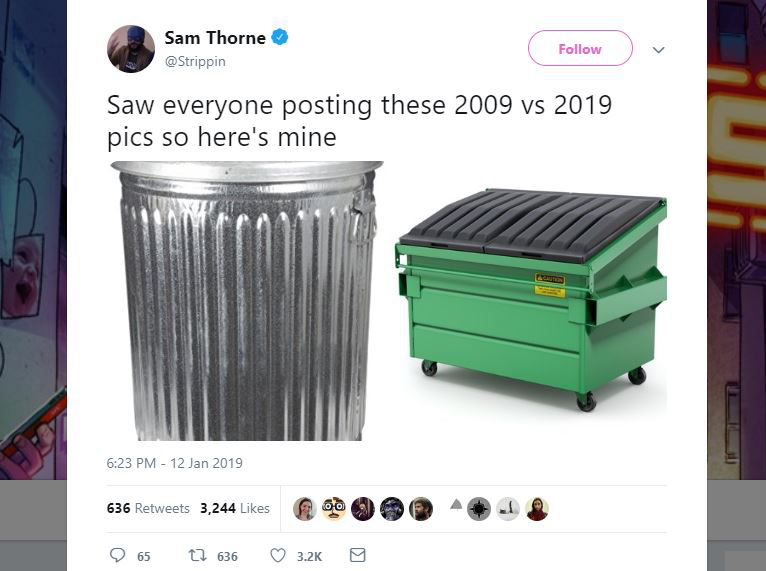

In [24]:
Image.open("Dataset/images/images/image_3.jpg")

In [25]:
dataset["image"] = dataset["image"].apply(lambda img: img.convert("RGB") if img else None)


C:\Users\Jason\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [26]:
dataset = dataset.dropna(subset=["image"])  # Remove rows with missing images
print(f"Loaded {dataset.shape[0]} images successfully.")

Loaded 6992 images successfully.


In [27]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    # transforms.Normalize([0.5], [0.5])
])

dataset["image_tensor"] = dataset["image"].apply(lambda img: transform(img) if img else None)
dataset = dataset.dropna(subset = ["image_tensor"])

In [28]:
# Load a tokenizer (for example, BERT tokenizer)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Function to tokenize text
def tokenize_text(text):
    if isinstance(text, str):  # Ensure text is a valid string
        return tokenizer(text, padding="max_length", truncation=True, return_tensors="pt")
    return None

# Apply tokenizer to corrected text
dataset["text_tokens"] = dataset["text_corrected"].apply(tokenize_text)

# Drop rows where tokenization failed
dataset = dataset.dropna(subset=["text_tokens"])

# Verify tokenization success
print(f"Tokenization completed for {dataset.shape[0]} samples.")

Tokenization completed for 6987 samples.


In [29]:
# Encode labels for the sentiment analysis tokens.
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset["sentiment_label"] = label_encoder.fit_transform(dataset["overall_sentiment"])

print("Sentiment classes: ",  label_encoder.classes_)


Sentiment classes:  ['negative' 'neutral' 'positive' 'very_negative' 'very_positive']


In [30]:
from torch.utils.data import Dataset, DataLoader

class MemeDataset(Dataset):
    def __init__(self, df):
        self.df = df  

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        return {
            "image": row["image_tensor"],
            "text": row["text_tokens"],
            "label": torch.tensor(row["sentiment_label"], dtype = torch.long)
        }

df = MemeDataset(dataset)
dataloader = DataLoader(df, batch_size=8, shuffle=True)

batch = next(iter(dataloader))
print("Sample batch: ", batch)


Sample batch:  {'image': tensor([[[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.8588, 0.6980, 0.6745,  ..., 0.3765, 0.3804, 0.3922],
          [0.8157, 0.4314, 0.4941,  ..., 0.4275, 0.4353, 0.4039],
          [0.9020, 0.7216, 0.7882,  ..., 0.3686, 0.3725, 0.3569]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.7333, 0.6118, 0.5843,  ..., 0.3922, 0.3961, 0.4039],
          [0.6980, 0.3961, 0.4549,  ..., 0.4627, 0.4745, 0.4471],
          [0.7647, 0.6275, 0.6824,  ..., 0.4039, 0.4039, 0.3961]],

         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000

In [31]:
dataset.head(10)

,Unnamed: 0,image_name,text_ocr,text_corrected,overall_sentiment,image,image_tensor,text_tokens,sentiment_label
0,0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive,<PIL.Image.Image image mode=RGB size=735x500 a...,"[[[tensor(0.5059), tensor(0.5059), tensor(0.50...","[input_ids, token_type_ids, attention_mask]",4
1,1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,very_positive,<PIL.Image.Image image mode=RGB size=749x506 a...,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...","[input_ids, token_type_ids, attention_mask]",4
2,2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,positive,<PIL.Image.Image image mode=RGB size=766x571 a...,"[[[tensor(0.1216), tensor(0.0941), tensor(0.11...","[input_ids, token_type_ids, attention_mask]",2
3,3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,positive,<PIL.Image.Image image mode=RGB size=500x334 a...,"[[[tensor(0.4745), tensor(0.4745), tensor(0.47...","[input_ids, token_type_ids, attention_mask]",2
4,4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral,<PIL.Image.Image image mode=RGB size=500x429 a...,"[[[tensor(0.9804), tensor(0.9765), tensor(0.96...","[input_ids, token_type_ids, attention_mask]",1
5,5,image_6.jpg,"1998: ""Don't get in car with strangers"" 2008: ...","1998: ""Don't get in car with strangers"" 2008: ...",negative,<PIL.Image.Image image mode=RGB size=540x960 a...,"[[[tensor(0.), tensor(0.), tensor(0.), tensor(...","[input_ids, token_type_ids, attention_mask]",0
6,6,image_7.png,10 years challenge is lit af Üs & B erg 1945 1...,10 years challenge is lit af Üs & B erg 1945 1...,negative,<PIL.Image.Image image mode=RGB size=500x566 a...,"[[[tensor(0.9137), tensor(0.9137), tensor(0.91...","[input_ids, token_type_ids, attention_mask]",0
7,7,image_8.jpg,10 Year Challenge emotional edition boredpanda...,10 Year Challenge emotional edition boredpanda...,neutral,<PIL.Image.Image image mode=RGB size=700x563 a...,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...","[input_ids, token_type_ids, attention_mask]",1
8,8,image_9.jpg,Fornite died in 10 months but Minecraft never ...,Fornite died in 10 months but Minecraft never ...,positive,<PIL.Image.Image image mode=RGB size=680x593 a...,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...","[input_ids, token_type_ids, attention_mask]",2
9,9,image_10.png,FACEBOOK '10 YEAR CHALLENGE': A PLOY OR A SIMP...,FACEBOOK '10 YEAR CHALLENGE': A PLOY OR A SIMP...,positive,<PIL.Image.Image image mode=RGB size=800x533 a...,"[[[tensor(1.), tensor(1.), tensor(1.), tensor(...","[input_ids, token_type_ids, attention_mask]",2


In [32]:
# Image to text Extractor
!pip install easyocr

In [33]:
# Using EasyOCR
import easyocr

reader = easyocr.Reader(['en'])

def extract_text(image_path):
    results = reader.readtext(image_path, detail = 0)
    return " ".join(results)


image_path = "Dataset/images/images/image_1.jpg"
text = extract_text(image_path)
print("Extracted Text: ", text)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Extracted Text:  LOOK THERE MY FRIEND NOW ALL SOHAI IKUT TREND PLAY THE 1OYEARS CHALLENGE AT FACEBOOK imgfip- Ai4i


In [34]:
# Cleaning the extracted text
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    text = re.sub(r"[^a-zA-Z0-9.,!?']", "", text)  # Remove special characters
    return text

# Clean the extracted text
cleaned_text = clean_text(text)
print("Cleaned Text:", cleaned_text)

Cleaned Text: looktheremyfriendnowallsohaiikuttrendplaythe1oyearschallengeatfacebookimgfipai4i


In [35]:
# Tokenize and normalize the text
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_clean_text(text):
    return tokenizer(text, padding = "max_length", truncation = True, return_tensors = "pt")

tokenized_text = tokenize_clean_text(cleaned_text)
print(tokenized_text)

{'input_ids': tensor([[  101,  2298, 12399, 26662, 19699,  9013,  2094, 19779,  8095,  6499,
         10932,  5480,  4904,  7913,  4859, 13068, 10760,  2487,  6977, 26492,
         18598,  7770,  3351,  4017, 12172,  8654,  5714, 25708, 11514,  4886,
          2549,  2072,   102,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,  

In [36]:
# Predicting sentiment analysis using the models
import torch

def predict_sentiment(tokenized_text, model):
    model.eval()
    with torch.no_grad():
        outputs = model(**tokenized_text)
        prediction = torch.argmax(outputs.logits, dim = 1).item()
    return prediction

sentiment = predict_sentiment(tokenized_text, model)
print("Predicted Sentiment: ", sentiment)

NameError: name 'model' is not defined

In [40]:
# Creating a DataLoader
train_loader = DataLoader(df, batch_size = 16, shuffle = True)

batch = next(iter(train_loader))
print("Image Shape:", batch["image"].shape)
print("Text Tokens Shape:", batch["text"]["input_ids"].shape)
print("Sentiment Label Shape:", batch["label"].shape)

Image Shape: torch.Size([16, 3, 128, 128])
Text Tokens Shape: torch.Size([16, 1, 512])
Sentiment Label Shape: torch.Size([16])


In [42]:
# Select models:
# 1. Multimodal Modal - ViLT (Vision and Language Transformer)
from transformers import ViltProcessor, ViltForQuestionAnswering

processor_Vilt = ViltProcessor.from_pretrained("dandelin/vilt-b32-mlm")
model_Vilt = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-mlm")

Some weights of ViltForQuestionAnswering were not initialized from the model checkpoint at dandelin/vilt-b32-mlm and are newly initialized: ['classifier.0.bias', 'classifier.0.weight', 'classifier.1.bias', 'classifier.1.weight', 'classifier.3.bias', 'classifier.3.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [44]:
# Train model with Pytorch
import torch
import torch.nn as nn
import torch.optim as optim

# Define Training Loop
def train_model(model, train_loader, epochs=5, lr=2e-5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = optim.AdamW(model.parameters(), lr=lr)
    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        total_loss = 0

        for batch in train_loader:
            images = batch["image"].to(device)
            texts = [t.lower() for t in batch["text"]]  # Extract text
            labels = batch["label"].to(device)

            # Process images and text
            inputs = processor_Vilt(images=images, text=texts, return_tensors="pt", padding=True)
            inputs = {k: v.to(device) for k, v in inputs.items()}  # Move to GPU

            optimizer.zero_grad()
            outputs = model(**inputs)
            loss = loss_fn(outputs.logits, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader)}")

    print("Training Complete!")

# Train the model
train_model(model_Vilt, train_loader, epochs=3)

It looks like you are trying to rescale already rescaled images. If the input images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again.


ValueError: The text inputs and image inputs need to have the same batch size